# All plots related to raw Wav2Vec2.0

In [2]:
import matplotlib.pyplot as plt
import utils

## 1. Plots of Wav2Vec2.0 on Librispeech test-clean downsampled across a range of rates

## 1. Load predictions

In [3]:
!gsutil -m cp -n -r gs://capstone_datasets/librispeech/test/predictions/* ./predictions/

Skipping existing item: file://./predictions/lr_clean_test_ds_1000Hz_w2v2_base_960h/dataset.arrow
Skipping existing item: file://./predictions/lr_clean_test_ds_1000Hz_w2v2_base_960h/dataset_info.json
Skipping existing item: file://./predictions/lr_clean_test_ds_1000Hz_w2v2_base_960h/state.json
Skipping existing item: file://./predictions/lr_clean_test_ds_16000Hz_w2v2_base_960h/dataset_info.json
Skipping existing item: file://./predictions/lr_clean_test_ds_16000Hz_w2v2_base_960h/dataset.arrow
Skipping existing item: file://./predictions/lr_clean_test_ds_16000Hz_w2v2_base_960h/state.json
Skipping existing item: file://./predictions/lr_clean_test_ds_2000Hz_w2v2_base_960h/dataset.arrow
Skipping existing item: file://./predictions/lr_clean_test_ds_2000Hz_w2v2_base_960h/dataset_info.json
Skipping existing item: file://./predictions/lr_clean_test_ds_4000Hz_w2v2_base_960h/dataset.arrow
Skipping existing item: file://./predictions/lr_clean_test_ds_2000Hz_w2v2_base_960h/state.json
Skipping exist

## 2. Compute WERs

In [4]:
prefix, suffix = 'lr_clean_test_ds_', 'Hz_w2v2_base_960h'
ds_rates = [int(2**k * 1000) for k in range(4,-2,-1)]
wers = []

for ds_rate in ds_rates:
    dataset = utils.load_from_disk(utils.os.path.join(utils.predictions_path, prefix + str(ds_rate) + suffix))
    wer = utils.wer(dataset['ground_truth'], dataset['transcription'])
    print('ds_rate = {} Hz : wer = {} {}'.format(ds_rate, round(100 * wer, 1), '%.'))
    wers.append(wer)


ds_rate = 16000 Hz : wer = 3.4 %.
ds_rate = 8000 Hz : wer = 4.2 %.
ds_rate = 4000 Hz : wer = 20.3 %.
ds_rate = 2000 Hz : wer = 84.9 %.
ds_rate = 1000 Hz : wer = 99.2 %.
ds_rate = 500 Hz : wer = 100.0 %.


In [5]:
print(wers)

[0.0338557516737675, 0.04161594643944005, 0.20250684723067558, 0.8493609251369446, 0.9918974437005478, 0.9999048995739501]


## 3. Draw plots

In [6]:
#ds_rates = [16000,8000,4000,2000,1000,500]
#wers = [0.0338557516737675, 0.04161594643944005, 0.20250684723067558, 0.8493609251369446, 0.9918974437005478, 0.9999048995739501]

In [7]:
ds_rates = [r / 1000 for r in ds_rates]

In [8]:
ds_rates

[16.0, 8.0, 4.0, 2.0, 1.0, 0.5]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


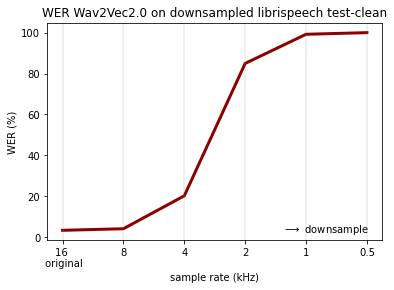

In [17]:
wers_percents = [100 * wer for wer in wers]
x_values = [1, 2, 3, 4, 5, 6]

# set figure
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(x_values, wers_percents, linewidth = 3, color='darkred')
ax.set_xticklabels([0, '16 \n original', 8, 4, 2, 1, 0.5])
for xc in x_values:
    plt.axvline(x=xc, color='grey', linewidth=0.25)
fig.canvas.draw()

# plot
plt.xlabel('sample rate (kHz)')
plt.ylabel('WER (%)')
plt.title('WER Wav2Vec2.0 on downsampled librispeech test-clean')
plt.figtext(0.77, 0.15, r'$\longrightarrow$ downsample', ha='center')
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


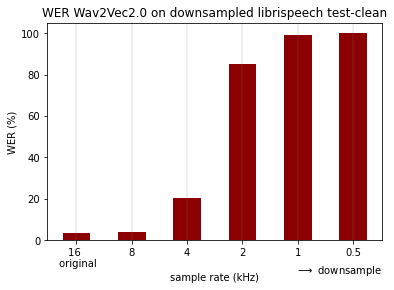

In [20]:
wers_percents = [100 * wer for wer in wers]
x_values = [1, 2, 3, 4, 5, 6]

# set figure
fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(x_values, wers_percents, width = 0.5, color='darkred')
ax.set_xticklabels([0, '16 \n original', 8, 4, 2, 1, 0.5])
for xc in x_values:
    plt.axvline(x=xc, color='grey', linewidth=0.25)
fig.canvas.draw()

# plot
plt.xlabel('sample rate (kHz)')
plt.ylabel('WER (%)')
plt.title('WER Wav2Vec2.0 on downsampled librispeech test-clean')
plt.figtext(0.8, 0.01, r'$\longrightarrow$ downsample', ha='center')
plt.show()